In [1]:
import os
from glob import glob
import numpy  as np
import gdal
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio
import sys
import matplotlib.pyplot as plt

In [4]:
path = os.getcwd()+"\\working_clusters\\Krishna"
krishna = glob(path+"\\*.tif")
krishna

['C:\\Users\\Hello\\Documents\\remote-sensing\\APIs\\SentinelSat\\working_clusters\\Krishna\\Krishna20170210.tif',
 'C:\\Users\\Hello\\Documents\\remote-sensing\\APIs\\SentinelSat\\working_clusters\\Krishna\\Krishna20180302.tif',
 'C:\\Users\\Hello\\Documents\\remote-sensing\\APIs\\SentinelSat\\working_clusters\\Krishna\\Krishna20190210.tif',
 'C:\\Users\\Hello\\Documents\\remote-sensing\\APIs\\SentinelSat\\working_clusters\\Krishna\\Krishna20200215.tif']

In [5]:
path = os.getcwd()+"\\working_clusters\\Godavari"
godavari = glob(path+"\\*.tif")
godavari

['C:\\Users\\Hello\\Documents\\remote-sensing\\APIs\\SentinelSat\\working_clusters\\Godavari\\Godavari20180225.tif',
 'C:\\Users\\Hello\\Documents\\remote-sensing\\APIs\\SentinelSat\\working_clusters\\Godavari\\Godavari20190215.tif']

In [13]:
def readImage(file_path):
    ds = gdal.Open(file_path)
    image = np.array(ds.GetRasterBand(1).ReadAsArray()).astype(float)
    return image

In [14]:
def calculateArea(clusters):
    dense = np.count_nonzero(clusters == -1)
    sparse = np.count_nonzero(clusters == 1)
    return [sparse/100, dense/100]

In [15]:
def getTotalArea(ndvi):
    return np.count_nonzero(ndvi >= -1) / 100

In [19]:
path = os.getcwd()+"\\ndvi_images\\Krishna"
tot_krishna = glob(path+"*.tif")
tot_krishna = tot_krishna[-1]
print(tot_krishna)

path = os.getcwd()+"\\ndvi_images\\Godavari"
tot_godavari = glob(path+"*.tif")
tot_godavari = tot_godavari[-1]
print(tot_godavari)

C:\Users\Hello\Documents\remote-sensing\APIs\SentinelSat\ndvi_images\Krishna20200215.tif
C:\Users\Hello\Documents\remote-sensing\APIs\SentinelSat\ndvi_images\Godavari20190215.tif


In [22]:
krishna_tot_area_hectares = getTotalArea(readImage(tot_krishna))
godavari_tot_area_hectares = getTotalArea(readImage(tot_godavari))

print("Krishna area: " + str(krishna_tot_area_hectares))
print("Godavari area: " + str(godavari_tot_area_hectares))

C:\Users\Hello\.conda\envs\pro\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  


Krishna area: 665513.15
Godavari area: 607815.22


In [27]:
krishna_area_hectares = {}
for date in krishna:
    dt = date.split('\\')[-1].split('.')[0][-8:]
    krishna_area_hectares[dt] = calculateArea(readImage(date))
    print(dt + " -- " + str(krishna_area_hectares[dt]))

20170210 -- [203746.81, 250965.42]
20180302 -- [255461.03, 161251.45]
20190210 -- [206381.17, 287396.5]
20200215 -- [113662.74, 414191.26]


In [28]:
godavari_area_hectares = {}
for date in godavari:
    dt = date.split('\\')[-1].split('.')[0][-8:]
    godavari_area_hectares[dt] = calculateArea(readImage(date))
    print(dt + " -- " + str(godavari_area_hectares[dt]))

20180225 -- [105882.7, 368983.63]
20190215 -- [94271.32, 403692.77]


In [32]:
krishna_sparse_area_hect = []
krishna_dense_area_hect = []
for dt in krishna_area_hectares.keys():
    krishna_sparse_area_hect.append(krishna_area_hectares[dt][0])
    krishna_dense_area_hect.append(krishna_area_hectares[dt][1])

godavari_sparse_area_hect = []
godavari_dense_area_hect = []
for dt in godavari_area_hectares.keys():
    godavari_sparse_area_hect.append(godavari_area_hectares[dt][0])
    godavari_dense_area_hect.append(godavari_area_hectares[dt][1])

krishna_dates = list(krishna_area_hectares.keys())
godavari_dates = list(godavari_area_hectares.keys())
print(krishna_dates)
print(krishna_sparse_area_hect)
print(krishna_dense_area_hect)
print(godavari_dates)
print(godavari_sparse_area_hect)
print(godavari_dense_area_hect)

['20170210', '20180302', '20190210', '20200215']
[203746.81, 255461.03, 206381.17, 113662.74]
[250965.42, 161251.45, 287396.5, 414191.26]
['20180225', '20190215']
[105882.7, 94271.32]
[368983.63, 403692.77]


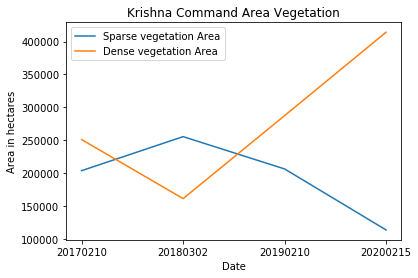

In [33]:
plt.plot(krishna_dates, krishna_sparse_area_hect, label = "Sparse vegetation Area") 
plt.plot(krishna_dates, krishna_dense_area_hect, label = "Dense vegetation Area") 

plt.xlabel('Date') 
plt.ylabel('Area in hectares') 

plt.title('Krishna Command Area Vegetation') 
plt.legend() 

plt.show() 

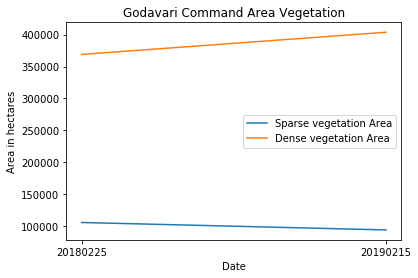

In [34]:
plt.plot(godavari_dates, godavari_sparse_area_hect, label = "Sparse vegetation Area") 
plt.plot(godavari_dates, godavari_dense_area_hect, label = "Dense vegetation Area") 

plt.xlabel('Date') 
plt.ylabel('Area in hectares') 

plt.title('Godavari Command Area Vegetation') 
plt.legend() 

plt.show() 